# Install custom package 

In [1]:
!python -m pip install --upgrade git+https://github.com/vigneshbabupj/Pyvisionaire.git#egg=Visionaire -q --quiet


     |████████████████████████████████| 634kB 9.6MB/s 


## Install requirments





In [2]:
!pip install -U git+https://github.com/albumentations-team/albumentations -q --quiet
!pip install torch-lr-finder -q --quiet

     |████████████████████████████████| 952kB 9.2MB/s 


In [3]:
!git clone https://github.com/vigneshbabupj/EVA5

Cloning into 'EVA5'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 120967 (delta 5), reused 21 (delta 2), pack-reused 120941
Receiving objects: 100% (120967/120967), 225.42 MiB | 23.92 MiB/s, done.
Resolving deltas: 100% (1229/1229), done.
Checking out files: 100% (120471/120471), done.


In [4]:
%cd EVA5/S12/

/content/EVA5/S12


In [5]:
import Visionaire
from Visionaire.trainer import trainer

## Define parameters for the training

In [6]:
params = {
    'Image_Augmentation':'TinyImagenet_Albumentation',
    'data' : 'TinyImagenet_dataloader',
    'model': 'ResNet18',
    'model_type':'EVA', # EVA or predefined
    'Batch_Size' : 256,
    'epochs':50,
    'criterion': 'CrossEntropyLoss',
    'L1_regularizer_lambda': 0,
    'L2_regularizer_lambda': 0.05,
    'optimizer': {
        'name':'SGD',
        'lr':0.001,
        'momentum':0.9
        #'weight_decay':0 L2_regularizer_lambda value will be automatically used here
                },
    'scheduler': {
         'name':'OneCycleLR',
         'max_at_epoch': 20
    }
}

## Create trainer object and load data( Tiny Imagenet)

In [7]:
my_trainer = trainer(params)
my_trainer.load_data()

Using Cuda :  True
Data Loader : 
starting loading data
finished loading data, in 41.7904577255249 seconds


## Model Summary

In [8]:
my_trainer.model_summary((3,64,64))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

## Find best learning rate


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.40E-02


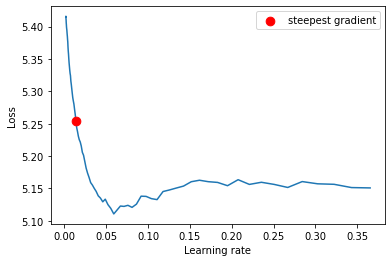

Best lr : 0.059163112406420956


In [9]:
my_trainer.find_lr()

## Model Training

In [11]:
my_trainer.run(0.05)

  0%|          | 0/391 [00:00<?, ?it/s]


 EPOCH: 0
Learning Rate :  0.0049999999999999975


Train: Batch id: 390 	Loss: 3.945954	 Accuracy:8.000: 100%|██████████| 391/391 [02:24<00:00,  2.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.016631, Accuracy: 1139/10000 (11.390%)


 EPOCH: 1
Learning Rate :  0.0052770830515474695


Train: Batch id: 390 	Loss: 3.584899	 Accuracy:18.530: 100%|██████████| 391/391 [02:23<00:00,  2.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.014064, Accuracy: 2011/10000 (20.110%)


 EPOCH: 2
Learning Rate :  0.006101507760193928


Train: Batch id: 390 	Loss: 3.023041	 Accuracy:25.568: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.013050, Accuracy: 2575/10000 (25.750%)


 EPOCH: 3
Learning Rate :  0.007452968871357754


Train: Batch id: 390 	Loss: 2.833666	 Accuracy:30.919: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.013127, Accuracy: 2666/10000 (26.660%)


 EPOCH: 4
Learning Rate :  0.009298180432263048


Train: Batch id: 390 	Loss: 2.473706	 Accuracy:35.132: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.012260, Accuracy: 2999/10000 (29.990%)


 EPOCH: 5
Learning Rate :  0.01159169561179458


Train: Batch id: 390 	Loss: 2.422336	 Accuracy:38.419: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.011409, Accuracy: 3331/10000 (33.310%)


 EPOCH: 6
Learning Rate :  0.014277026037977675


Train: Batch id: 390 	Loss: 2.181984	 Accuracy:41.384: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.011499, Accuracy: 3468/10000 (34.680%)


 EPOCH: 7
Learning Rate :  0.01728803308424344


Train: Batch id: 390 	Loss: 2.346046	 Accuracy:43.978: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.010521, Accuracy: 3839/10000 (38.390%)


 EPOCH: 8
Learning Rate :  0.020550556837648743


Train: Batch id: 390 	Loss: 2.376941	 Accuracy:46.700: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.010360, Accuracy: 3867/10000 (38.670%)


 EPOCH: 9
Learning Rate :  0.02398424262820782


Train: Batch id: 390 	Loss: 1.747238	 Accuracy:48.736: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.010852, Accuracy: 3866/10000 (38.660%)


 EPOCH: 10
Learning Rate :  0.027504520132640386


Train: Batch id: 390 	Loss: 1.672352	 Accuracy:51.400: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.010176, Accuracy: 4256/10000 (42.560%)


 EPOCH: 11
Learning Rate :  0.031024686307993356


Train: Batch id: 390 	Loss: 1.793850	 Accuracy:53.283: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.009820, Accuracy: 4283/10000 (42.830%)


 EPOCH: 12
Learning Rate :  0.03445804085330487


Train: Batch id: 390 	Loss: 1.739803	 Accuracy:55.242: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.009401, Accuracy: 4586/10000 (45.860%)


 EPOCH: 13
Learning Rate :  0.03772002160373409


Train: Batch id: 390 	Loss: 1.764504	 Accuracy:57.447: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.009845, Accuracy: 4450/10000 (44.500%)


 EPOCH: 14
Learning Rate :  0.04073028726324387


Train: Batch id: 390 	Loss: 1.537932	 Accuracy:58.958: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008839, Accuracy: 4786/10000 (47.860%)


 EPOCH: 15
Learning Rate :  0.04341469617895371


Train: Batch id: 390 	Loss: 1.432907	 Accuracy:60.867: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.009242, Accuracy: 4691/10000 (46.910%)


 EPOCH: 16
Learning Rate :  0.04570713242073328


Train: Batch id: 390 	Loss: 1.462857	 Accuracy:62.573: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008926, Accuracy: 4915/10000 (49.150%)


 EPOCH: 17
Learning Rate :  0.04755113419041811


Train: Batch id: 390 	Loss: 1.206455	 Accuracy:64.442: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008206, Accuracy: 5196/10000 (51.960%)


 EPOCH: 18
Learning Rate :  0.04890128445357235


Train: Batch id: 390 	Loss: 1.155658	 Accuracy:66.193: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008232, Accuracy: 5193/10000 (51.930%)


 EPOCH: 19
Learning Rate :  0.049724329543088246


Train: Batch id: 390 	Loss: 1.075175	 Accuracy:67.938: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008134, Accuracy: 5256/10000 (52.560%)


 EPOCH: 20
Learning Rate :  0.04999999911233535


Train: Batch id: 390 	Loss: 1.203035	 Accuracy:69.461: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008375, Accuracy: 5312/10000 (53.120%)


 EPOCH: 21
Learning Rate :  0.0498637231418214


Train: Batch id: 390 	Loss: 1.050584	 Accuracy:71.190: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.009284, Accuracy: 5019/10000 (50.190%)


 EPOCH: 22
Learning Rate :  0.049457774069812936


Train: Batch id: 390 	Loss: 0.999305	 Accuracy:72.957: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008423, Accuracy: 5320/10000 (53.200%)


 EPOCH: 23
Learning Rate :  0.04878659955929322


Train: Batch id: 390 	Loss: 0.892820	 Accuracy:74.715: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.007967, Accuracy: 5495/10000 (54.950%)


 EPOCH: 24
Learning Rate :  0.047857553138651775


Train: Batch id: 390 	Loss: 1.182087	 Accuracy:76.619: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008645, Accuracy: 5258/10000 (52.580%)


 EPOCH: 25
Learning Rate :  0.04668081363488862


Train: Batch id: 390 	Loss: 0.845208	 Accuracy:78.024: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008296, Accuracy: 5557/10000 (55.570%)


 EPOCH: 26
Learning Rate :  0.04526927365225557


Train: Batch id: 390 	Loss: 0.777467	 Accuracy:79.861: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008619, Accuracy: 5483/10000 (54.830%)


 EPOCH: 27
Learning Rate :  0.04363839831818605


Train: Batch id: 390 	Loss: 0.833716	 Accuracy:81.291: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008785, Accuracy: 5421/10000 (54.210%)


 EPOCH: 28
Learning Rate :  0.041806055844122766


Train: Batch id: 390 	Loss: 0.903974	 Accuracy:83.151: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008709, Accuracy: 5524/10000 (55.240%)


 EPOCH: 29
Learning Rate :  0.03979232175765385


Train: Batch id: 390 	Loss: 0.661086	 Accuracy:84.633: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008610, Accuracy: 5684/10000 (56.840%)


 EPOCH: 30
Learning Rate :  0.0376192589508316


Train: Batch id: 390 	Loss: 0.503816	 Accuracy:86.557: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008879, Accuracy: 5630/10000 (56.300%)


 EPOCH: 31
Learning Rate :  0.03531067595451021


Train: Batch id: 390 	Loss: 0.359530	 Accuracy:88.019: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.009149, Accuracy: 5558/10000 (55.580%)


 EPOCH: 32
Learning Rate :  0.032891866087099396


Train: Batch id: 390 	Loss: 0.402369	 Accuracy:89.433: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008924, Accuracy: 5646/10000 (56.460%)


 EPOCH: 33
Learning Rate :  0.030389330335675046


Train: Batch id: 390 	Loss: 0.317131	 Accuracy:90.915: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008814, Accuracy: 5782/10000 (57.820%)


 EPOCH: 34
Learning Rate :  0.02783048700561902


Train: Batch id: 390 	Loss: 0.272955	 Accuracy:92.255: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008802, Accuracy: 5807/10000 (58.070%)


 EPOCH: 35
Learning Rate :  0.025243371319927814


Train: Batch id: 390 	Loss: 0.265951	 Accuracy:93.670: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.009069, Accuracy: 5866/10000 (58.660%)


 EPOCH: 36
Learning Rate :  0.02265632825944262


Train: Batch id: 390 	Loss: 0.203981	 Accuracy:94.744: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.009000, Accuracy: 5876/10000 (58.760%)


 EPOCH: 37
Learning Rate :  0.020097702009307678


Train: Batch id: 390 	Loss: 0.272529	 Accuracy:95.739: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.009202, Accuracy: 5877/10000 (58.770%)


 EPOCH: 38
Learning Rate :  0.01759552541414643


Train: Batch id: 390 	Loss: 0.109948	 Accuracy:96.581: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.009200, Accuracy: 5953/10000 (59.530%)


 EPOCH: 39
Learning Rate :  0.015177212844349577


Train: Batch id: 390 	Loss: 0.125330	 Accuracy:97.235: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.009004, Accuracy: 6030/10000 (60.300%)


 EPOCH: 40
Learning Rate :  0.01286925983849625


Train: Batch id: 390 	Loss: 0.072958	 Accuracy:97.993: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008893, Accuracy: 6070/10000 (60.700%)


 EPOCH: 41
Learning Rate :  0.010696952812688803


Train: Batch id: 390 	Loss: 0.086352	 Accuracy:98.365: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008853, Accuracy: 6049/10000 (60.490%)


 EPOCH: 42
Learning Rate :  0.008684092017286456


Train: Batch id: 390 	Loss: 0.063626	 Accuracy:98.696: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008930, Accuracy: 6088/10000 (60.880%)


 EPOCH: 43
Learning Rate :  0.006852730776381823


Train: Batch id: 390 	Loss: 0.056410	 Accuracy:98.910: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008883, Accuracy: 6135/10000 (61.350%)


 EPOCH: 44
Learning Rate :  0.00522293386696724


Train: Batch id: 390 	Loss: 0.067141	 Accuracy:99.047: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008997, Accuracy: 6141/10000 (61.410%)


 EPOCH: 45
Learning Rate :  0.0038125576850391893


Train: Batch id: 390 	Loss: 0.048931	 Accuracy:99.187: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008852, Accuracy: 6144/10000 (61.440%)


 EPOCH: 46
Learning Rate :  0.0026370546071870535


Train: Batch id: 390 	Loss: 0.024577	 Accuracy:99.306: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008960, Accuracy: 6151/10000 (61.510%)


 EPOCH: 47
Learning Rate :  0.0017093036911216188


Train: Batch id: 390 	Loss: 0.056066	 Accuracy:99.350: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008868, Accuracy: 6145/10000 (61.450%)


 EPOCH: 48
Learning Rate :  0.0010394695700236614


Train: Batch id: 390 	Loss: 0.036747	 Accuracy:99.377: 100%|██████████| 391/391 [02:22<00:00,  2.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008806, Accuracy: 6150/10000 (61.500%)


 EPOCH: 49
Learning Rate :  0.0006348910866957286


Train: Batch id: 390 	Loss: 0.045213	 Accuracy:99.437: 100%|██████████| 391/391 [02:22<00:00,  2.74it/s]



Test set: loss: 0.009005, Accuracy: 6162/10000 (61.620%)



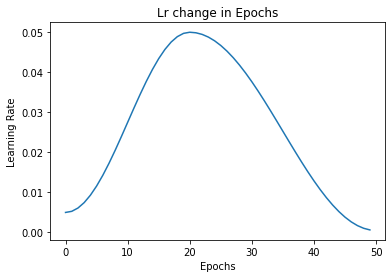

In [12]:
my_trainer.plot_lr()

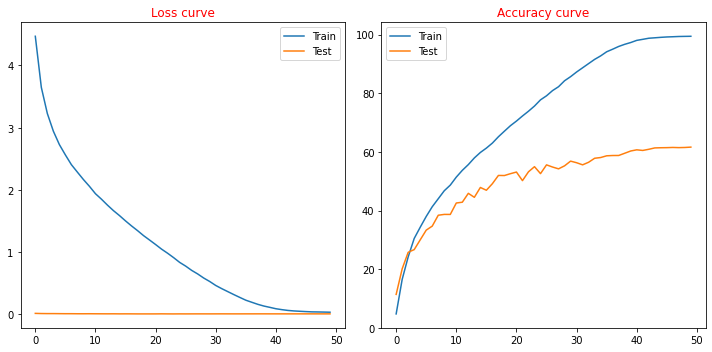

In [13]:
my_trainer.plot_model_performance(False)